# Habitable Exoplanets -- Research Project 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Trim dataset to only necessary or useful parts

In [4]:
all_exoplanets = pd.read_csv('kepler.csv')
all_exoplanets_drop = all_exoplanets.drop(columns=['angular_distance','orbital_period','eccentricity','inclination','star_distance','star_age','star_metallicity','planet_status','mass','mass_error_min', 'mass_error_max','mass_sini', 'mass_sini_error_min', 'mass_sini_error_max','radius_error_min', 'radius_error_max', 'orbital_period_error_min', 'orbital_period_error_max','semi_major_axis_error_min','semi_major_axis_error_max','eccentricity_error_min','eccentricity_error_max','inclination_error_min','inclination_error_max','omega', 'omega_error_min', 'omega_error_max', 'tperi','tperi_error_min', 'tperi_error_max', 'tconj', 'tconj_error_min','tconj_error_max', 'tzero_tr', 'tzero_tr_error_min','tzero_tr_error_max', 'tzero_tr_sec', 'tzero_tr_sec_error_min','tzero_tr_sec_error_max', 'lambda_angle', 'lambda_angle_error_min','lambda_angle_error_max', 'impact_parameter','impact_parameter_error_min', 'impact_parameter_error_max', 'tzero_vr','tzero_vr_error_min', 'tzero_vr_error_max', 'k', 'k_error_min','k_error_max','temp_calculated_error_min','temp_calculated_error_max','hot_point_lon','geometric_albedo', 'geometric_albedo_error_min','geometric_albedo_error_max', 'log_g', 'publication_status','detection_type', 'mass_detection_type', 'radius_detection_type','alternate_names', 'molecules', 'ra', 'dec','mag_v','mag_i', 'mag_j', 'mag_h', 'mag_k','star_distance_error_min', 'star_distance_error_max','star_metallicity_error_min','star_metallicity_error_max','star_mass_error_min','star_mass_error_max','star_radius_error_min','star_radius_error_max','star_age_error_min', 'star_age_error_max', 'star_teff','star_teff_error_min', 'star_teff_error_max', 'star_detected_disc','star_alternate_names', 'temp_calculated', 'temp_measured', 'star_magnetic_field', 'radius', 'discovered', 'updated'])

#drop rows with missing data & reset the index
exoplanets = all_exoplanets_drop.dropna()
exoplanets = exoplanets.reset_index(drop=True)
exoplanets = exoplanets.rename(columns={'star_sp_type':'spectral_type', '# name': 'planet_name'})

In [5]:
exoplanets

,planet_name,semi_major_axis,star_name,star_mass,star_radius,spectral_type
0,11 Com b,1.2900,11 Com,2.70,19.000,G8 III
1,11 UMi b,1.5400,11 UMi,1.80,24.080,K4III
2,14 And b,0.8300,14 And,2.20,11.000,K0III
3,14 Her b,2.7700,14 Her,0.90,0.708,K0 V
4,16 Cyg B b,1.6800,16 Cyg B,1.01,0.980,G2.5 V
...,...,...,...,...,...,...
869,tau Gem b,1.1700,tau Gem,2.30,26.800,K2III
870,ups And b,0.0590,ups And,1.27,1.631,F8 V
871,ups And c,0.8610,ups And,1.27,1.631,F8 V
872,ups And d,2.5500,ups And,1.27,1.631,F8 V


### Divide data into its various parts

In [6]:
planet_name = exoplanets['planet_name']
star_name = exoplanets['star_name']
semi_major_axis = exoplanets['semi_major_axis']
star_mass = exoplanets['star_mass']
star_radius = exoplanets['star_radius']
spectral_type = exoplanets['spectral_type']

In [24]:
class exoplanet(object):
    def __init__(self,pl_name,st_name,semi_major,st_mass,st_radius,st_spectral):
        
        self.pl_name = pl_name
        self.st_name = st_name
        self.semi_major = semi_major
        self.st_mass = st_mass
        self.st_radius = st_radius
        self.st_spectral = st_spectral
        self.st_temp = self.calculate_temp()
        self.st_lum = 4*np.pi*((st_radius*696342000)**2)*5.67e-8*(self.st_temp**4)
        self.habitable_zone = self.find_habitable_zone()
        self.habitability = self.find_habitability()
        
    def calculate_temp(self):
        if self.st_spectral[0] == 'O':
            return 40000
        elif self.st_spectral[0] == 'B':
            return 20000
        elif self.st_spectral[0] == 'A':
            return 8750
        elif self.st_spectral[0] == 'F':
            return 6750
        elif self.st_spectral[0] == 'G':
            return 5500
        elif self.st_spectral[0] == 'K':
            return 4250
        elif self.st_spectral[0] == 'M':
            return 3000
        elif self.st_spectral[0] == 's':
            return 30000
        else:
            return 3500
    
    def find_habitable_zone(self):
        scale = np.sqrt(self.st_lum / 3.828e26)
        
        inner = 0.95 * scale
        outer = 1.37 * scale
        
        return (inner,outer)
        
    def get_pl_name(self):
        return self.pl_name
    
    def get_st_name(self):
        return self.st_name
    
    def get_semi(self):
        return self.semi_major
    
    def get_st_mass(self):
        return self.st_mass
    
    def get_st_radius(self):
        return self.st_radius
    
    def get_st_spectral(self):
        return self.st_spectral
    
    def get_st_lum(self):
        return self.st_lum
    
    def get_st_temp(self):
        return self.st_temp
    
    def get_habitable_zone(self):
        return self.habitable_zone
    
    def find_habitability(self):
        if (self.habitable_zone[0] < self.semi_major) and (self.semi_major < self.habitable_zone[1]):
            return 1
        else:
            return 0
            

### Convert data into exoplanet objects

In [25]:
exoplanet_list = []

for row in exoplanets.iterrows():
    exoplanet_list.append(exoplanet(row[1][0],row[1][2],row[1][1],row[1][3],row[1][4],row[1][5]))
    
len(exoplanet_list)

874

In [26]:
habitable_zone_list=[]

for obj in exoplanet_list:
    habitable_zone_list.append(obj.get_habitable_zone())

In [27]:
semi_major_axis_list=[]

for obj in exoplanet_list:
    semi_major_axis_list.append(obj.get_semi())

In [30]:
habitability_list=[]

for obj in exoplanet_list:
    habitability_list.append(obj.find_habitability())

In [60]:
habitability_array=np.array(habitability_list)
habitable_number=int(len(np.where(habitability_array==1)[0]))
nonhabitable_number=int(len(np.where(habitability_array==0)[0]))
print(len(np.where(habitability_array==0)[0]), "is the number of uninhabitable exoplanets")
print(len(np.where(habitability_array==1)[0]), "is the number of habitable exoplanets")

823 is the number of uninhabitable exoplanets
51 is the number of habitable exoplanets


([<matplotlib.patches.Wedge at 0x7f73bf631b80>,
 [Text(1.0815683868355968, 0.20052387538107555, 'habitable'),
  Text(-1.0815683915291965, -0.20052385006514023, 'nonhabitable')],
 [Text(0.5899463928194163, 0.10937665929876848, '5.8%'),
  Text(-0.5899463953795617, -0.10937664549007647, '94.2%')])

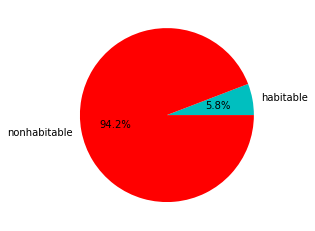

In [66]:
data=[habitable_number,nonhabitable_number]
types=["habitable","nonhabitable"]
color=["c","r"]
plt.pie(data,labels=types,autopct='%1.1f%%',colors=color)

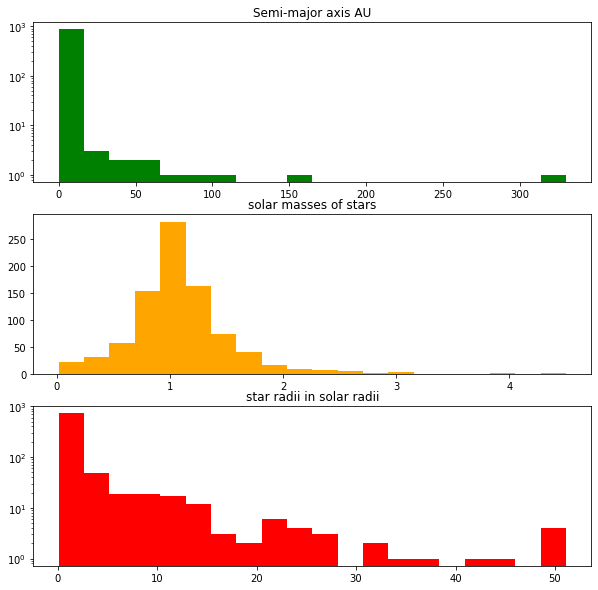

In [105]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.hist(semi_major_axis,20,color='green') 
plt.title("Semi-major axis AU")
plt.yscale('log')
plt.subplot(3,1,2)
plt.hist(star_mass,20,color='orange')
plt.title("solar masses of stars")
plt.subplot(3,1,3)
plt.hist(star_radius,20,color="red")
plt.title("star radii in solar radii")
plt.yscale('log')